WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
                  GPM_mean  GPM_median    GPM_std    DPM_mean  DPM_median  \
championRole                                                                
Assassin        415.618994  410.786565  63.902019  809.670107  767.990980   
Fighter         425.852260  421.816181  63.511842  765.657594  721.581028   
Mage - Mid      414.778934  411.472005  67.184797  846.280461  834.761530   
Mage - Support  363.767115  363.320611  74.297761  519.202598  433.952065   
Marksman        420.562501  418.417266  71.857264  819.546954  782.547771   
Tank            377.149098  388.057206  60.515777  628.004988  606.669318   

                   DPM_std  visionScore_mean  visionScore_median  \
championRole                                                       
Assassin        289.471220         17.671569                17.0   
Fighter         257.808974         16.665000                16.0   
Mage - Mid      300.812412         17.

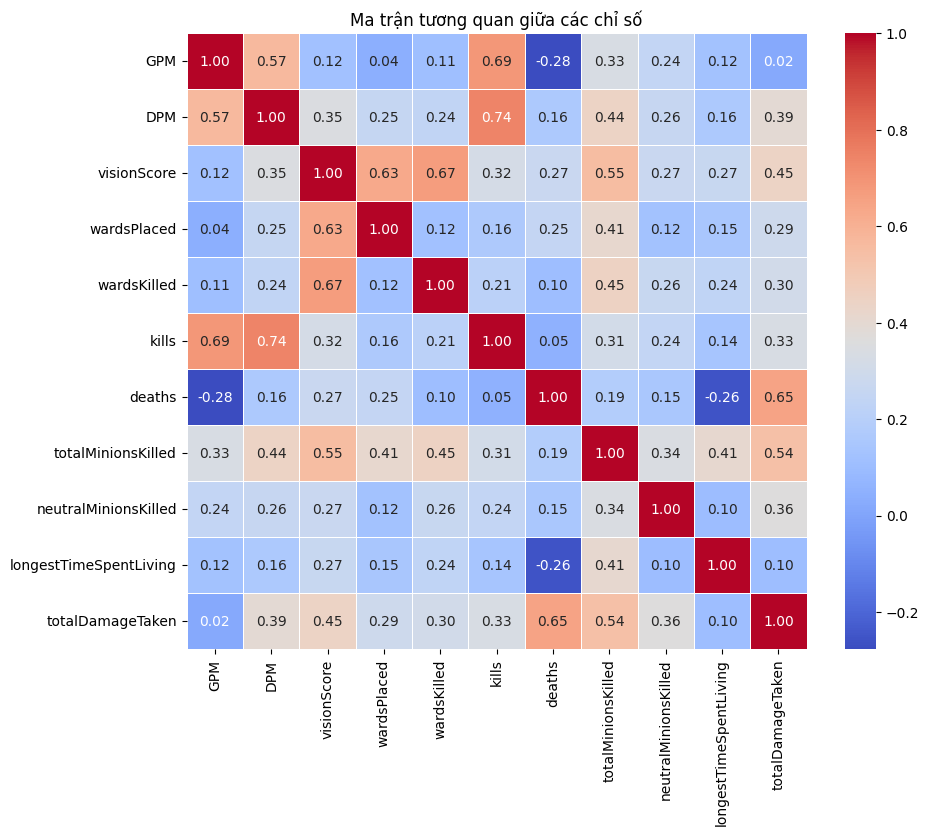

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn file
file_path = "C:\\Users\\PC\\Desktop\\RIOT\\combine_mid_players_updated.xls"

# Đọc dữ liệu
df = pd.read_excel(file_path)

# Kiểm tra cột quan trọng
required_columns = {'championName', 'timePlayed', 'goldEarned', 
                    'totalDamageDealtToChampions', 'visionScore', 
                    'wardsPlaced', 'wardsKilled', 'kills', 'deaths', 
                    'totalMinionsKilled', 'neutralMinionsKilled', 
                    'longestTimeSpentLiving', 'totalDamageTaken','championRole'}

missing_columns = required_columns - set(df.columns)
if missing_columns:
    print(f"❌ Missing columns in dataset: {missing_columns}")
    exit()

# Loại bỏ dòng có timePlayed = 0
df = df[df['timePlayed'] > 0]

# Tính toán chỉ số mới
df['GPM'] = df['goldEarned'] / df['timePlayed'] * 60
df['DPM'] = df['totalDamageDealtToChampions'] / df['timePlayed'] * 60

# Danh sách chỉ số quan trọng
stats_columns = ['GPM', 'DPM', 'visionScore', 'wardsPlaced', 'wardsKilled', 
                 'kills', 'deaths', 'totalMinionsKilled', 'neutralMinionsKilled', 
                 'longestTimeSpentLiving', 'totalDamageTaken']


role_stats = df.groupby('championRole')[stats_columns].agg(['mean', 'median', 'std'])

# ✅ Đổi tên cột cho dễ đọc
role_stats.columns = ['_'.join(col).strip() for col in role_stats.columns]

# 🔥 Hiển thị kết quả
print(role_stats)

# ✅ Kiểm tra dữ liệu trước khi vẽ heatmap
correlation_matrix = df[stats_columns].corr()

# 🔥 Vẽ ma trận tương quan giữa các chỉ số
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các chỉ số')
plt.show()
